In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [78]:
x = np.random.randn(100)
y = x * 7

# y = y + np.random.randn(100)

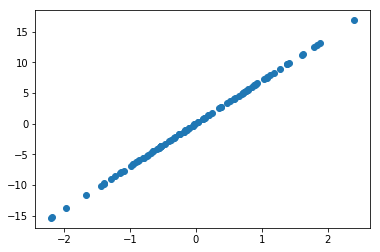

In [79]:
plt.scatter(x, y)

In [80]:
a = 3
y_hat = a * x
err = np.sum((y - y_hat) ** 2) / y.size
err

14.005364510627116

In [81]:
w = np.linspace(-1, 7, 100)
costs = []
for i in w:
    y_hat = i * x
    cost = np.sum((y - y_hat) ** 2) / y.size
    costs.append(cost)
min(costs)

0.0

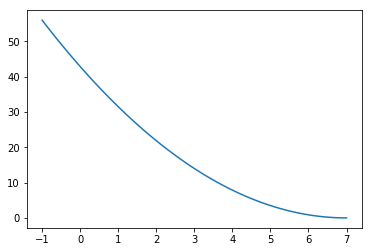

In [82]:
plt.plot(w, costs)

In [85]:
epochs = 100000
w = np.random.rand(1)
learning_rate = 1e-2
for epoch in range(epochs):
    y_hat = w * x
    w = w - learning_rate * (y_hat - y).mean()
print(w)

[6.98293357]


In [249]:
x1 = np.array([True, True, False, False])
x2 = np.array([True, False, True, False])
X = np.c_[x1, x2] # 두 array를 열로 저장
X = X.astype(int)

# y = np.array([True, False, False, False])
y_and = np.array(x1 & x2).reshape(-1, 1)
y_and = y_and.astype(int)

y_or = np.array(x1 | x2).reshape(-1, 1)
y_or = y_or.astype(int)

y_nand = np.array(~x1 | ~x2).reshape(-1, 1)
y_nand = y_nand.astype(int)

w = np.random.randn(2, 1)
b = np.random.randn(1)
learning_rate = 1e-3
epochs = 100000
for i in range(epochs):
    y_hat = np.dot(X, w) + b
    w = w - learning_rate * ((y_or - y_hat)*X).mean()
    b = b - learning_rate * (y_or - y_hat).mean()
w, b

(array([[9.08644968e+68],
        [9.08644968e+68]]),
 array([1.53210323e+69]))

In [256]:
def and_predict(x1, x2):
    # return np.where(x1 * w[0] + x2 * w[1] + b >= 0, 'True', 'False')
    # return np.where(x1 * 0.5 + x2 * 0.5 >= 0.6, 'True', 'False')
    # return np.where(x1 * w[0] + x2 * w[1] >= b, 'True', 'False')
    result = x1 * w[0] + x2 * w[1] + b
    return np.where(result >= b * 2, 'True', 'False')

def or_predict(x1, x2):
    # return np.where(x1 * w[0] + x2 * w[1] + b >= 0, 'True', 'False')
    # return np.where(x1 * 0.5 + x2 * 0.5 >= 0.6, 'True', 'False')
    # return np.where(x1 * w[0] + x2 * w[1] >= b, 'True', 'False')
    result = x1 * w[0] + x2 * w[1] + b
    return np.where(result >= b * 2, 'True', 'False')
    # return result

def nand_predict(x1, x2, w1, w2, b):
    if x1 * w1 + x2 * w2 <= b:
        return True
    else:
        return False

def xor_predict(x1, x2, w1, w2, b):
    if x1 * w1 + x2 * w2 <= b:
        return 'True'
    else:
        return 'False'

def predict(x1, x2, w1, w2, b):
    if x1 * w1 + x2 * w2 >= b:
        return True
    else:
        return False

In [224]:
for i in range(len(X)):
    print(X[i], 'AND:', and_predict(X[i, 0], X[i, 1]))
print()
for i in range(len(X)):
    print(X[i], 'OR:', or_predict(X[i, 0], X[i, 1]))
print()
for i in range(len(X)):
    print(X[i], 'NAND:', nand_predict(X[i, 0], X[i, 1]))
print()
correct = np.array([False, True, True, False])
for i in range(len(X)):
    print(X[i], 'NAND:', nand_predict(X[i, 0], X[i, 1]))

[1 1] AND: ['True']
[1 0] AND: ['False']
[0 1] AND: ['False']
[0 0] AND: ['False']

[1 1] OR: ['True']
[1 0] OR: ['False']
[0 1] OR: ['False']
[0 0] OR: ['False']

[1 1] NAND: False
[1 0] NAND: True
[0 1] NAND: True
[0 0] NAND: True


In [238]:
w1 = np.linspace(0.01, 0.99, 10)
w2 = np.linspace(0.01, 0.99, 10)
b = np.linspace(0.01, 0.99, 10)


for i in w1:
    for j in w2:
        for k in b:
            cnt = 0
            for l in range(4):
                cnt += predict(X[l, 0], X[l, 1], i, j, k) == y_and[l]
                if cnt == 4:
                    print(i, j, k)
                    break


0.11888888888888888 0.11888888888888888 0.22777777777777777
0.11888888888888888 0.22777777777777777 0.33666666666666667
0.11888888888888888 0.33666666666666667 0.44555555555555554
0.11888888888888888 0.44555555555555554 0.5544444444444444
0.11888888888888888 0.5544444444444444 0.6633333333333333
0.11888888888888888 0.6633333333333333 0.7722222222222221
0.11888888888888888 0.7722222222222221 0.8811111111111111
0.11888888888888888 0.8811111111111111 0.99
0.22777777777777777 0.11888888888888888 0.33666666666666667
0.22777777777777777 0.22777777777777777 0.33666666666666667
0.22777777777777777 0.22777777777777777 0.44555555555555554
0.22777777777777777 0.33666666666666667 0.44555555555555554
0.22777777777777777 0.33666666666666667 0.5544444444444444
0.22777777777777777 0.44555555555555554 0.5544444444444444
0.22777777777777777 0.44555555555555554 0.6633333333333333
0.22777777777777777 0.5544444444444444 0.6633333333333333
0.22777777777777777 0.5544444444444444 0.7722222222222221
0.22777777

In [240]:
for i in range(len(X)):
    print(X[i], 'AND:', predict(X[i, 0], X[i, 1], 0.11888888888888888, 0.11888888888888888, 0.22777777777777777))

[1 1] AND: True
[1 0] AND: False
[0 1] AND: False
[0 0] AND: False


In [248]:
w1 = np.linspace(0.01, 0.99, 10)
w2 = np.linspace(0.01, 0.99, 10)
b = np.linspace(0.01, 0.99, 10)

flag = False
if not flag:
    for i in w1:
        if not flag:
            for j in w2:
                if not flag:
                    for k in b:
                        if not flag:
                            cnt = 0
                            for l in range(4):
                                cnt += predict(X[l, 0], X[l, 1], i, j, k) == y_or[l]
                                if cnt == 4:
                                    print(i, j, k)
                                    # flag = True
                                    for i in range(len(X)):
                                        print(X[i], 'OR:', predict(X[i, 0], X[i, 1], i, j, k))


0.01 0.01 0.01
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.11888888888888888 0.01
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.11888888888888888 0.11888888888888888
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.22777777777777777 0.01
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.22777777777777777 0.11888888888888888
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.22777777777777777 0.22777777777777777
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.33666666666666667 0.01
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.33666666666666667 0.11888888888888888
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.33666666666666667 0.22777777777777777
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.33666666666666667 0.33666666666666667
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
3 0.44555555555555554 0.01
[1 1] OR: True


In [257]:
w1 = np.linspace(0.01, 0.99, 10)
w2 = np.linspace(0.01, 0.99, 10)
b = np.linspace(0.01, 0.99, 10)

flag = False
if not flag:
    for i in w1:
        if not flag:
            for j in w2:
                if not flag:
                    for k in b:
                        if not flag:
                            cnt = 0
                            for l in range(4):
                                cnt += nand_predict(X[l, 0], X[l, 1], i, j, k) == y_nand[l]
                                if cnt == 4:
                                    print(i, j, k)
                                    # flag = True
                                    for i in range(len(X)):
                                        print(X[i], 'OR:', predict(X[i, 0], X[i, 1], i, j, k))


0.01 0.01 0.01
[1 1] OR: True
[1 0] OR: True
[0 1] OR: True
[0 0] OR: False
0.11888888888888888 0.01 0.11888888888888888
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.22777777777777777 0.01 0.22777777777777777
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.33666666666666667 0.01 0.33666666666666667
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.44555555555555554 0.01 0.44555555555555554
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.5544444444444444 0.01 0.5544444444444444
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.6633333333333333 0.01 0.6633333333333333
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.7722222222222221 0.01 0.7722222222222221
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.8811111111111111 0.01 0.8811111111111111
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] OR: False
0.99 0.01 0.99
[1 1] OR: False
[1 0] OR: True
[0 1] OR: False
[0 0] 

In [273]:
from sklearn.datasets import load_iris
X = load_iris()['data']
Y = load_iris()['target']

In [275]:
def step(X):
    return np.where(X > 0, 1, 0)

In [276]:
w1 = np.random.randn(4, 7)
b1 = np.random.randn(7)

w2 = np.random.randn(7, 100)
b2 = np.random.randn(100)

w3 = np.random.randn(100, 1)
b3 = np.random.randn(1)

In [277]:
layer1 = np.dot(X, w1) + b1
layer1_act = step(layer1)
layer2 = np.dot(layer1_act, w2) + b2
layer2_act = step(layer2)
output = np.dot(layer2_act, w3) + b3

In [272]:
np.mean((output - y) ** 2)

array([[-126.73638183],
       [-135.74930412],
       [-113.40867714],
       [-109.13836405],
       [-115.10132332],
       [-125.77909386],
       [ -95.8367888 ],
       [-123.39555878],
       [-105.24518811],
       [-130.60342833],
       [-137.65275352],
       [-108.41967723],
       [-129.12158538],
       [ -96.79407677],
       [-154.69841841],
       [-125.64834743],
       [-129.49705406],
       [-126.34090481],
       [-151.8560209 ],
       [-111.57582648],
       [-149.6293617 ],
       [-115.79221222],
       [ -90.72650051],
       [-131.98520613],
       [-105.63120708],
       [-140.91351977],
       [-121.67511469],
       [-132.83008753],
       [-138.37144034],
       [-110.62020699],
       [-122.2552655 ],
       [-150.69738775],
       [-105.55438801],
       [-122.54612554],
       [-130.20795131],
       [-135.40775445],
       [-155.7586549 ],
       [-108.47360459],
       [-101.5628154 ],
       [-130.41875454],
       [-120.24719911],
       [-140.473

In [281]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# conda create -n keras python=3.9
# conda install ipykernel
# python -m ipykernel install --user --name keras

In [286]:
X = load_iris()['data']
Y = load_iris()['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

model = keras.models.Sequential(
    [
        keras.layers.Dense(10, activation='relu', input_shape=(4, )),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(3, activation='softmax'),
    ]
)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100)



Epoch 1/100


ValueError: in user code:

    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [291]:
import tensorflow.keras.datasets
dir(keras.datasets)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [292]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
model1 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, Y_train, epochs=100)
model1.evaluate(X_test, Y_test)

11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/100
1875/1875 [==============================] - 21s 8ms/step - loss: 1.5784 - accuracy: 0.8850
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2333 - accuracy: 0.9403
Epoch 3/100
 849/1875 [============>.................] - ETA: 7s - loss: 0.1767 - accuracy: 0.9509

KeyboardInterrupt: 

In [293]:
print(model1.evaluate(X_test, Y_test))
print(np.argmax(model1.predict(X_test[7])))
plt.imshow(X_test[7])

313/313 [==============================] - 7s 12ms/step - loss: 0.2134 - accuracy: 0.9559
[0.21336494386196136, 0.9559000134468079]


ValueError: in user code:

    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\functional.py:420 call
        return self._run_internal_graph(
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_15 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28)


In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model2 = Sequential()
# model2.add(Dense(256, activation='sigmoid', input_dim=28*28))
model2.add(Dense(256, activation='sigmoid', input_shape=(28*28, )))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
X_train1 = X_train.reshape(-1, 28*28)
X_test1 = X_test.reshape(-1, 28*28)

history = model2.fit(X_train1, Y_train, epochs=100, batch_size=128)
model2.evalute(X_test1, Y_test)

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.3955 - accuracy: 0.8818
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2175 - accuracy: 0.9335
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1754 - accuracy: 0.9455
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1536 - accuracy: 0.9522
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1352 - accuracy: 0.9586
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1276 - accuracy: 0.9607
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1187 - accuracy: 0.9641
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1073 - accuracy: 0.9675
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1023 - accuracy: 0.9681
Epoch 10/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0993 - accur

KeyboardInterrupt: 